In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib
from functools import partial, reduce
from collections import defaultdict, Counter

def compose(*funcs):
    return reduce(lambda f, g: lambda *args: f(*g(*args)), funcs, lambda *args: args)

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from sga import *
from operators import *
from mutations import *
from plot import *

In [51]:
opts = {
    8: 134,
    10: 430,
    12: 580,
    13: 1912,
    14: 2320,
    15: 2230,
    16: 16898,
    '16a': 16898,
    20: 7750,
    30: 28706,
}

In [6]:
nug_instance = 12
results = {}


def get_tai_name(n):
    return 'tai{}a'.format(n)


def get_qap_instance_url(name):
    return 'http://anjos.mgi.polymtl.ca/qaplib/data.d/{}.dat'.format(name)


def get_qap_data(nug_instance, get_name=lambda n: 'nug{}'.format(n)):
    qap_instance_file = urllib.urlopen(get_qap_instance_url(get_name(nug_instance)))
    
    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    print('Fetching problem size: %d' % n)
    print('OPT: %d' % opts[n])

    A = np.empty((n, n))
    if n <= 30:
        qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))

    B = np.empty((n, n))
    if n != 50:
        qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    return A, B


flow, distance = get_qap_data(nug_instance)


Fetching problem size: 12
OPT: 580


In [19]:
def q3ap_objective_function(n, A, pq):
    p, q = pq
    flow, distance = A
    s = 0.0
    for i in range(n):
        for j in range(n):
            s += flow[p[i], p[j]] * flow[q[i], q[j]] * distance[i, j]**2
    return s

Fetching problem size: 12
OPT: 580
  0     0.53368998 min: 6726.00000000 mean: 9363.01333333 max: 10542.00000000 std: 798.19466453
 10     5.20553184 min: 5482.00000000 mean: 6593.18000000 max: 6928.00000000 std: 267.47753476
 20     9.90082097 min: 5156.00000000 mean: 5906.53066667 max: 6138.00000000 std: 179.82735719
 30    14.46889496 min: 4970.00000000 mean: 5382.16000000 max: 5526.00000000 std: 122.71274207
 40    18.92990088 min: 4902.00000000 mean: 5085.28533333 max: 5138.00000000 std:  63.35362067
 50    23.40157700 min: 4898.00000000 mean: 4967.28533333 max: 4970.00000000 std:  10.78523303
 60    27.96869183 min: 4898.00000000 mean: 4916.72533333 max: 4964.00000000 std:  20.83437604
 70    32.55231595 min: 4652.00000000 mean: 4866.12533333 max: 4902.00000000 std:  34.84748138
 80    37.06507897 min: 4652.00000000 mean: 4721.54000000 max: 4832.00000000 std:  87.58580783
 90    41.56320691 min: 4644.00000000 mean: 4646.63866667 max: 4652.00000000 std:   3.52969851
 99    45.6110

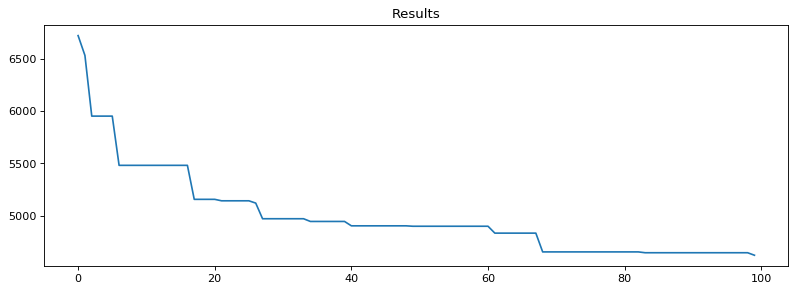

In [52]:
n = 12
flow, distance = get_qap_data(n)
params = {
    'T': 100,
    'population_size': 1500,
    'chromosome_length': n,
    'crossover_probability': 0.95,
    'mutation_probability': 0.25,
    'distance_matrix': (flow, distance),
    'crossover_operator': double_pmx_crossover,
    'local_search_probability': 0.0,
    'local_search_k': 3,
    'mutation_operator': k_double_scramble_mutation(3),
    'objective_func': q3ap_objective_function,
    'gen_initial_sample': gen_double_initial_sample,
    'gen_random_sample': gen_random_double_sample,
}

results = sga(**params)

plot_sga_results(n, opts, **results)

Fetching problem size: 14
OPT: 2320
  0     0.42899799 min: 13530.00000000 mean: 17570.97600000 max: 19314.00000000 std: 1235.71681522
 20     7.81205082 min: 10784.00000000 mean: 11745.13800000 max: 12130.00000000 std: 315.58692773
 40    15.04929590 min: 9834.00000000 mean: 10115.67800000 max: 10442.00000000 std: 200.81941220
 60    22.48602295 min: 9282.00000000 mean: 9282.00000000 max: 9282.00000000 std:   0.00000000
 80    29.95544696 min: 9268.00000000 mean: 9268.00000000 max: 9268.00000000 std:   0.00000000
100    37.46019292 min: 9204.00000000 mean: 9248.78400000 max: 9268.00000000 std:  29.13625480
120    44.88809395 min: 9204.00000000 mean: 9204.00000000 max: 9204.00000000 std:   0.00000000
140    52.30436897 min: 9136.00000000 mean: 9136.00000000 max: 9136.00000000 std:   0.00000000
160    59.67981601 min: 9136.00000000 mean: 9136.00000000 max: 9136.00000000 std:   0.00000000
180    66.89092684 min: 9136.00000000 mean: 9136.00000000 max: 9136.00000000 std:   0.00000000
199  

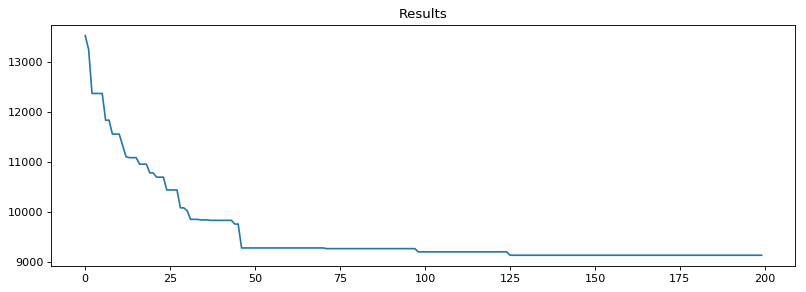

In [49]:
n = 14
flow, distance = get_qap_data(n)
params = {
    'T': 200,
    'population_size': 1000,
    'chromosome_length': n,
    'crossover_probability': 0.85,
    'mutation_probability': 0.30,
    'distance_matrix': (flow, distance),
    'crossover_operator': double_pmx_crossover,
    'local_search_probability': 0.0,
    'local_search_k': 3,
    'mutation_operator': k_double_scramble_mutation(3),
    'objective_func': q3ap_objective_function,
    'gen_initial_sample': gen_double_initial_sample,
    'gen_random_sample': gen_random_double_sample,
}

results = sga(**params)

plot_sga_results(n, opts, **results)

Fetching problem size: 16
OPT: 16898
  0     0.50756192 min: 25388.00000000 mean: 33070.53400000 max: 35836.00000000 std: 1961.44327240
 20     9.70313096 min: 20844.00000000 mean: 23330.62000000 max: 24104.00000000 std: 537.37178154
 40    18.86411691 min: 19560.00000000 mean: 20860.83200000 max: 21352.00000000 std: 378.24760644
 60    28.08071494 min: 18574.00000000 mean: 19721.24600000 max: 19924.00000000 std: 151.91851594
 80    37.32464790 min: 18022.00000000 mean: 18357.28600000 max: 18574.00000000 std: 243.23581604
100    46.48786402 min: 17816.00000000 mean: 17903.02200000 max: 17932.00000000 std:  49.76793663
120    55.74446893 min: 16962.00000000 mean: 17576.51400000 max: 17816.00000000 std: 282.95751590
140    64.95666599 min: 16886.00000000 mean: 16886.00000000 max: 16886.00000000 std:   0.00000000
160    74.02768707 min: 16802.00000000 mean: 16802.00000000 max: 16802.00000000 std:   0.00000000
180    83.24068594 min: 16670.00000000 mean: 16689.90800000 max: 16722.00000000 

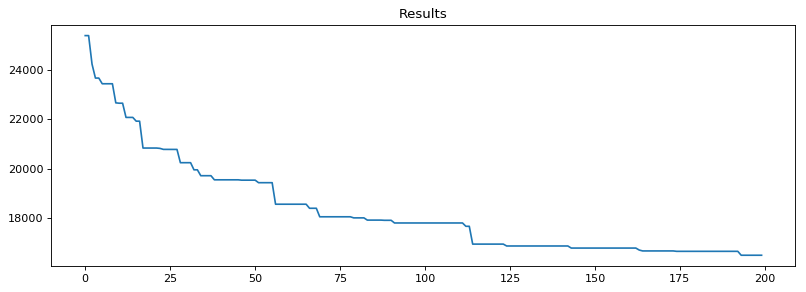

In [53]:
problem_name = '16a'
n = 16
flow, distance = get_qap_data(problem_name)
params = {
    'T': 200,
    'population_size': 1000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.30,
    'distance_matrix': (flow, distance),
    'crossover_operator': double_pmx_crossover,
    'local_search_probability': 0.0,
    'local_search_k': 3,
    'mutation_operator': k_double_scramble_mutation(3),
    'objective_func': q3ap_objective_function,
    'gen_initial_sample': gen_double_initial_sample,
    'gen_random_sample': gen_random_double_sample,
}

results = sga(**params)

plot_sga_results(problem_name, opts, **results)